<a href="https://colab.research.google.com/github/Jakondo/Python-for-DL-and-CV/blob/master/Ch4_Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4: Linear Regression - PyTorch
---





In [0]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

#Making Predictions

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x +b
  return y

In [0]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

#Linear Class

In [0]:
torch.manual_seed(1) #используется для того чтобы вводимые рандомные значения не менялись
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [0]:
x = torch.tensor([[2.0], [3.0], [4.5]])
model(x)

tensor([[0.5891],
        [1.1044],
        [1.8773]], grad_fn=<AddmmBackward>)

#Custom Modules

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1, 1)
#print(list(model.parameters()))

#Creating Dataset

Text(0.5, 0, 'X')

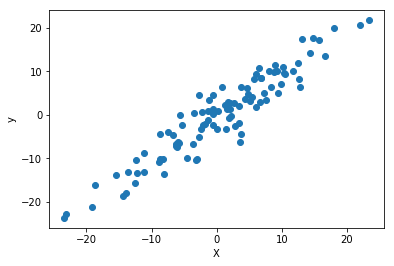

In [0]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o');
plt.ylabel('y')
plt.xlabel('X')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1, 1)

In [0]:
[w, b] = model.parameters()
def get_params():
  return(w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

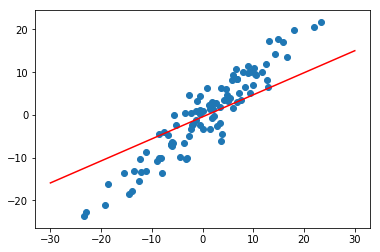

In [44]:
plot_fit('Initial Model')

#Gradient Decent

> **Обучение простой линейной модели**



In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [50]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("ecpoch: ", i, "loss: ", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

ecpoch:  0 loss:  10.052502632141113
ecpoch:  1 loss:  10.05250072479248
ecpoch:  2 loss:  10.052499771118164
ecpoch:  3 loss:  10.052498817443848
ecpoch:  4 loss:  10.052497863769531
ecpoch:  5 loss:  10.052496910095215
ecpoch:  6 loss:  10.052495956420898
ecpoch:  7 loss:  10.052495002746582
ecpoch:  8 loss:  10.052495002746582
ecpoch:  9 loss:  10.052494049072266
ecpoch:  10 loss:  10.05249309539795
ecpoch:  11 loss:  10.052492141723633
ecpoch:  12 loss:  10.052491188049316
ecpoch:  13 loss:  10.052491188049316
ecpoch:  14 loss:  10.052490234375
ecpoch:  15 loss:  10.052489280700684
ecpoch:  16 loss:  10.052488327026367
ecpoch:  17 loss:  10.052488327026367
ecpoch:  18 loss:  10.05248737335205
ecpoch:  19 loss:  10.05248737335205
ecpoch:  20 loss:  10.052486419677734
ecpoch:  21 loss:  10.052486419677734
ecpoch:  22 loss:  10.052485466003418
ecpoch:  23 loss:  10.052485466003418
ecpoch:  24 loss:  10.052485466003418
ecpoch:  25 loss:  10.052484512329102
ecpoch:  26 loss:  10.0524835

Text(0.5, 0, 'Epoch')

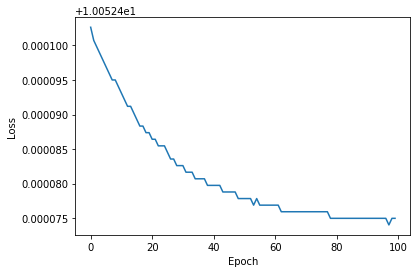

In [52]:
plt.plot(range(epochs), losses);
plt.ylabel('Loss')
plt.xlabel('Epoch')

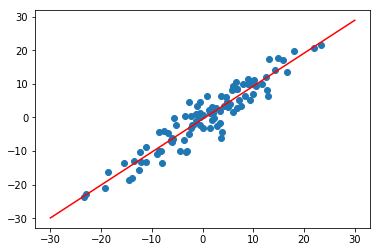

In [53]:
plot_fit("Trained model")